In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [2]:
df1 = pd.read_csv("logs/20251116_091553_monitor.csv", skiprows=1).reset_index().rename(columns={"index": "idx"})
df1["idx"] = df1["idx"] + 1 # start from 1
df1.set_index("idx", inplace=True)
df1["accumulated_steps"] = df1["l"].cumsum()
df1

,r,l,t,accumulated_steps
idx,,,,
1,11.390304,310,16.188421,310
2,11.511990,248,29.022684,558
3,15.425304,476,53.052695,1034
4,12.913630,434,74.758905,1468
5,23.782372,503,99.669750,1971
...,...,...,...,...
216,40.113076,266,3556.491694,66623
217,37.393833,272,3569.503808,66895
218,44.091408,374,3588.364450,67269


In [3]:
filt = df1["r"] == 36.547205
df1[filt]

,r,l,t,accumulated_steps
idx,,,,
139,36.547205,252,2382.720962,44931


array([<Axes: xlabel='idx'>, <Axes: xlabel='idx'>], dtype=object)

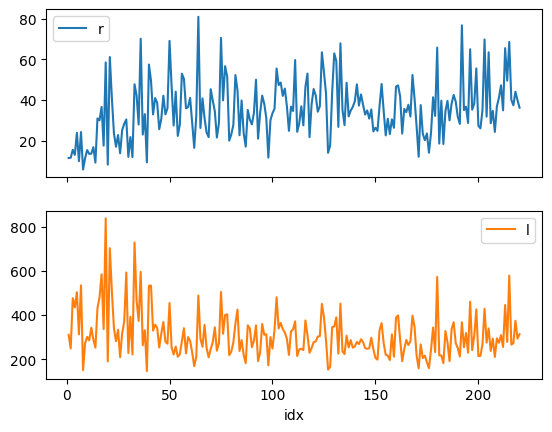

In [4]:
df1[['r','l']].plot(subplots=True, kind="line")

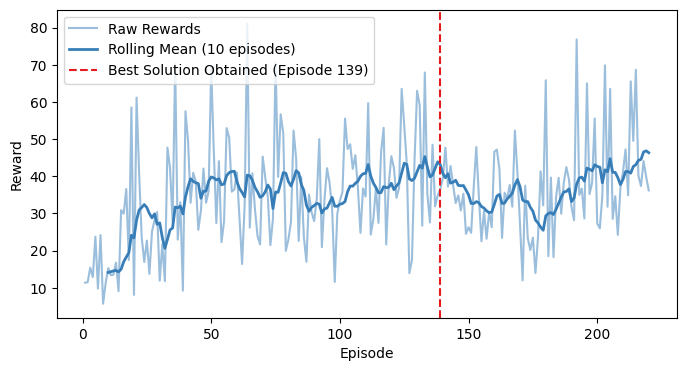

In [5]:
fig, ax = plt.subplots(figsize=(8, 4))
colors = sns.color_palette("Set1", 3)
# plot rolling average
# df1["r"].rolling(window=10).mean().plot(ax=ax)
ax.plot(df1.index.values, df1["r"], label="Raw Rewards", alpha=0.5, color=colors[1])
ax.plot(df1.index.values, df1["r"].rolling(window=10).mean(), label="Rolling Mean (10 episodes)", linewidth=2, color=colors[1])
# plot raw rewards
# df1.plot(y="r", kind="line", ax=ax, alpha=0.5)
# Vertical line for baseline
ax.axvline(x=139, color=colors[0], linestyle="--", label="Best Solution Obtained (Episode 139)")
ax.legend()
ax.set_xlabel("Episode")
ax.set_ylabel("Reward")

fig.savefig("figures/training_curve.png", dpi=300, bbox_inches='tight')

In [6]:
df2 = pd.read_csv("logs/20251116_091553_training.csv")
df2

,rollout/ep_rew_mean,train/ent_coef_loss,time/time_elapsed,train/n_updates,time/episodes,time/fps,train/critic_loss,train/actor_loss,train/ent_coef,time/total_timesteps,rollout/ep_len_mean,train/learning_rate
0,12.810307,-2.054103,73,1367,4,19,0.120106,-11.927916,0.663822,1468,367.000000,0.0003
1,14.344569,-4.274032,149,2866,8,19,0.632975,-17.415880,0.423825,2967,370.875000,0.0003
2,14.025866,-5.921347,208,4067,12,19,0.349709,-19.841499,0.296232,4168,347.333333,0.0003
3,15.940859,-7.737630,280,5519,16,20,0.127697,-21.054092,0.193067,5620,351.250000,0.0003
4,18.788288,-9.548706,379,7466,20,19,0.094545,-21.415255,0.109351,7567,378.350000,0.0003
5,21.595696,-11.360720,486,9296,24,19,0.121352,-20.588558,0.065047,9397,391.541667,0.0003
6,21.719031,-11.179452,557,10526,28,19,0.582837,-19.531979,0.046268,10627,379.535714,0.0003
7,21.374916,-10.335417,639,11959,32,18,0.225048,-18.364075,0.031095,12060,376.875000,0.0003
8,24.225571,-7.529186,761,14120,36,18,0.623484,-16.928974,0.018729,14221,395.027778,0.0003
9,24.871643,-4.869571,832,15392,40,18,1.010183,-16.545908,0.015061,15493,387.325000,0.0003


<Axes: >

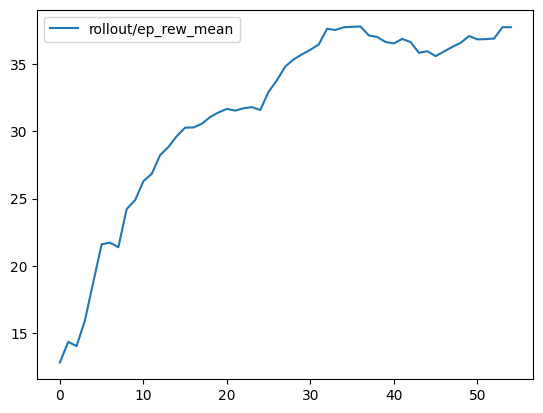

In [7]:
df2.plot(y="rollout/ep_rew_mean", kind="line")